In [2]:
import yfinance as yf

# Get stock data for Tesla (TSLA)
tesla_data = yf.download('TSLA')

# Reset the index to make 'Date' a regular column
tesla_data = tesla_data.reset_index()

# Save the data to a CSV file
tesla_data.to_csv('tesla_data.csv', index=False)

# Display the first five rows
print(tesla_data.head())


[*********************100%***********************]  1 of 1 completed

        Date      Open      High       Low     Close  Adj Close     Volume
0 2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
1 2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2 2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
4 2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500


In [7]:
# prompt: Use Webscraping to Extract Tesla Revenue Data and display only the last five rows of the tesla_revenue dataframe using the tail function.

import pandas as pd
import requests
from bs4 import BeautifulSoup

# URL of the Wikipedia page containing Tesla revenue data
url = "https://en.wikipedia.org/wiki/Tesla,_Inc."
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table containing revenue data
revenue_table = soup.find('table', class_='wikitable')

# Extract data from the table
rows = revenue_table.find_all('tr')
data = []
for row in rows[1:]:  # Skip the header row
  cols = row.find_all('td')
  if len(cols) >= 2:
    year = cols[0].text.strip()
    revenue = cols[1].text.strip()
    data.append({'Year': year, 'Revenue': revenue})

# Create a Pandas DataFrame
tesla_revenue = pd.DataFrame(data)

# Display the last five rows
print(tesla_revenue.tail())


   Year                         Revenue
1  2016              Gigafactory Nevada
2  2017            Gigafactory New York
3  2019            Gigafactory Shanghai
4  2022  Gigafactory Berlin-Brandenburg
5  2022               Gigafactory Texas


In [8]:
# prompt: Use yfinance to Extract Stock Data
# Reset the index, save, and display the first five rows of the gme_data dataframe using the head function.

# Get stock data for Gamestop (GME)
gme_data = yf.download('GME')

# Reset the index to make 'Date' a regular column
gme_data = gme_data.reset_index()

# Save the data to a CSV file
gme_data.to_csv('gme_data.csv', index=False)

# Display the first five rows
print(gme_data.head())


[*********************100%***********************]  1 of 1 completed

        Date     Open     High      Low    Close  Adj Close    Volume
0 2002-02-13  2.40625  2.51500  2.38125  2.51250   1.691666  76216000
1 2002-02-14  2.54375  2.54875  2.48125  2.50000   1.683250  11021600
2 2002-02-15  2.50000  2.50625  2.46250  2.48750   1.674834   8389600
3 2002-02-19  2.47500  2.47500  2.34375  2.38750   1.607504   7410400
4 2002-02-20  2.40000  2.46875  2.38125  2.46875   1.662210   6892800


In [9]:
# prompt: Use Webscraping to Extract GME Revenue Data Display the last five rows of the gme_revenue dataframe using the tail function.

# URL of the Wikipedia page containing GameStop revenue data
url = "https://en.wikipedia.org/wiki/GameStop"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table containing revenue data (inspect the page to find the correct table)
revenue_table = soup.find('table', class_='wikitable')

# Extract data from the table
rows = revenue_table.find_all('tr')
data = []
for row in rows[1:]:  # Skip the header row
  cols = row.find_all('td')
  if len(cols) >= 2:
    year = cols[0].text.strip()
    revenue = cols[1].text.strip()
    data.append({'Year': year, 'Revenue': revenue})

# Create a Pandas DataFrame
gme_revenue = pd.DataFrame(data)

# Display the last five rows
print(gme_revenue.tail())


    Year Revenue
20  2019  $525.4
21  2020  $625.3
22  2021  $591.8
23  2022  $588.7
24  2023  $522.5


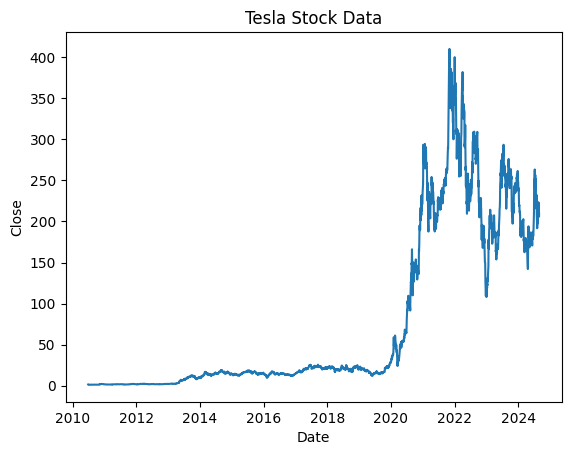

In [11]:
# prompt: Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock):
  plt.plot(stock_data['Date'], stock_data['Close'])
  plt.xlabel("Date")
  plt.ylabel("Close")
  plt.title(stock + " Stock Data")
  plt.show()

make_graph(tesla_data, tesla_revenue, 'Tesla')


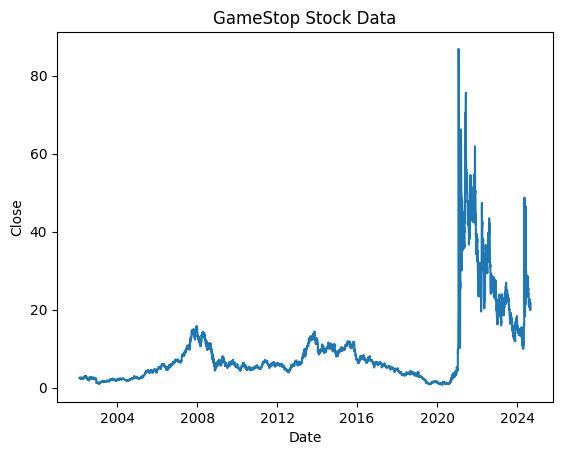

In [13]:
# prompt: Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.

make_graph(gme_data, gme_revenue, 'GameStop')
